# Transformaciones a nivel pixel

In [72]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [22]:
cat = cv2.imread('cat.jpeg')
rubik = cv2.imread('rubik.png')

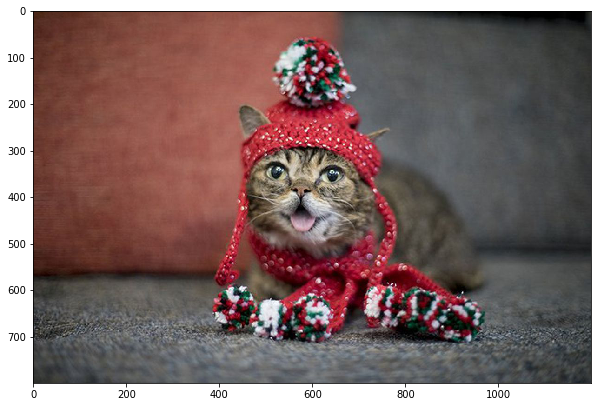

In [23]:
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(cat,cv2.COLOR_BGR2RGB))

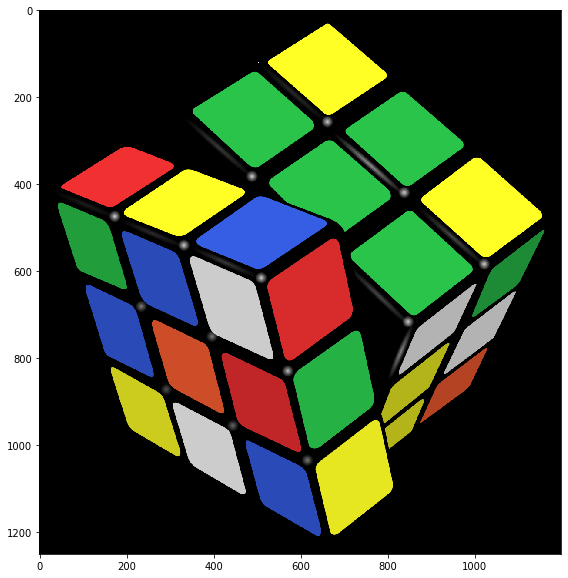

In [24]:
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(rubik,cv2.COLOR_BGR2RGB))

### Resize

In [25]:
cat.shape

(800, 1200, 3)

In [26]:
rubik.shape

(1250, 1200, 3)

In [29]:
rubik = cv2.resize(rubik,(1200,800))

In [30]:
rubik.shape

(800, 1200, 3)

### Suma

In [33]:
img_sum  = cat+rubik

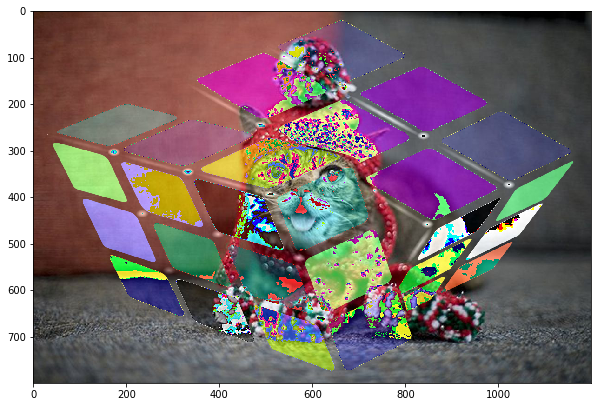

In [36]:
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(img_sum,cv2.COLOR_BGR2RGB))

In [83]:
img_mean = 0.5*cat+0.5*rubik
img_mean = img_mean.astype(np.dtype('uint8'))

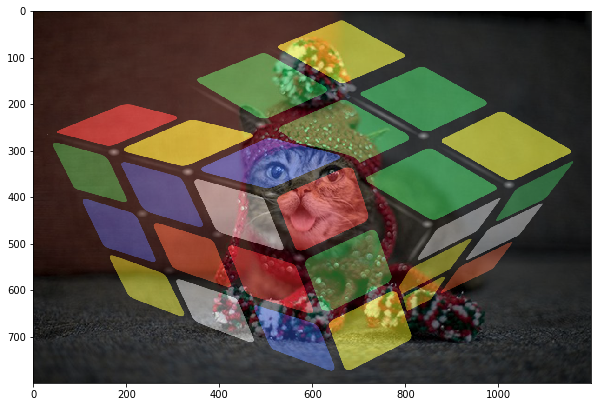

In [84]:
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(img_mean,cv2.COLOR_BGR2RGB))

### Linear blend

$(1-\alpha)img_1 + \alpha img_2$

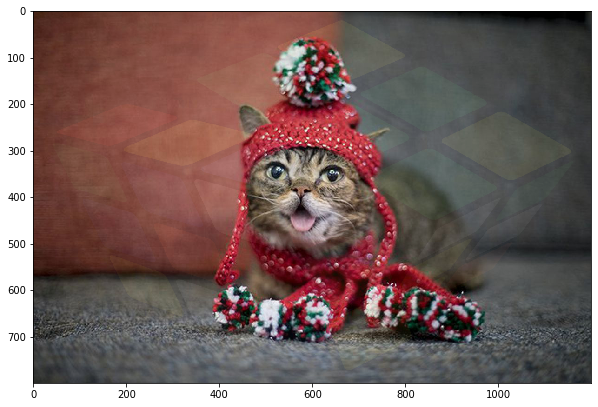

In [91]:
𝛼 = 0.95
img_blend = rubik*(1-𝛼)+ 𝛼*cat
img_blend = img_blend.astype(np.dtype('uint8'))


plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(img_blend,cv2.COLOR_BGR2RGB))

### Corrección gamma

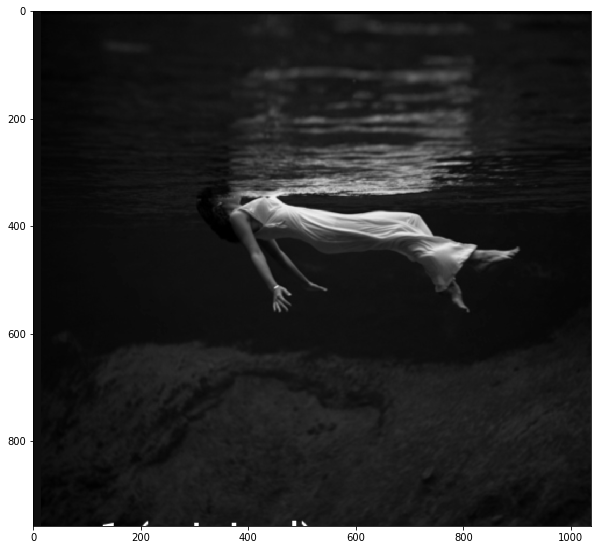

In [127]:
women = cv2.imread('gamma.png')
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(women,cv2.COLOR_BGR2RGB))

$img^{\frac{1}{𝛾}}$

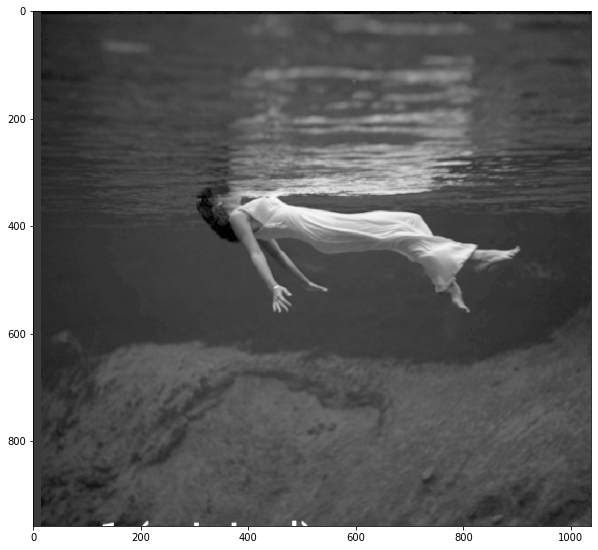

In [162]:
𝛾 = 2

gamma = women/255
gamma = gamma**(1.0/𝛾)
gamma = gamma*255
gamma = gamma.astype(np.dtype('uint8'))
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(gamma,cv2.COLOR_BGR2RGB))

### RBG a escala de grises

$0.2989R + 0.5870G + 0.1140B$

### Histograma

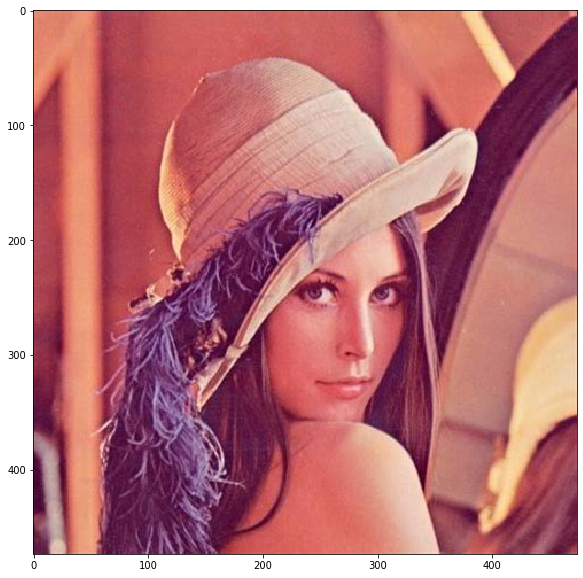

In [368]:
lena = cv2.imread('lena.jpg')
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(lena,cv2.COLOR_BGR2RGB))

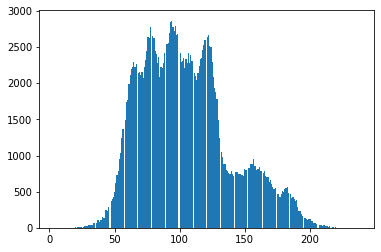

In [371]:
hisr_b = plt.hist(lena[:,:,0].flatten(),bins = 256)

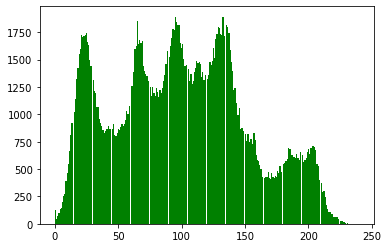

In [372]:
hisr_g = plt.hist(lena[:,:,1].flatten(),bins = 256,color='g')

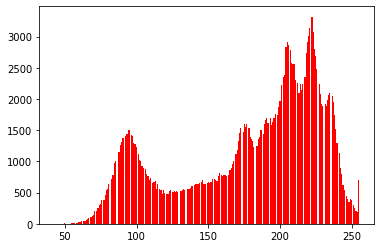

In [373]:
hisr_r = plt.hist(lena[:,:,2].flatten(),bins = 256,color='r')

### Cálculo de histograma

In [374]:
def channel_hist(channel):
    hist = np.zeros(256)
    for pixel in channel.flatten():
        hist[pixel]+=1
    return hist

In [383]:
hist_b = channel_hist(lena[:,:,0])
hist_g = channel_hist(lena[:,:,1])
hist_r = channel_hist(lena[:,:,2])

### Distribución acumulada

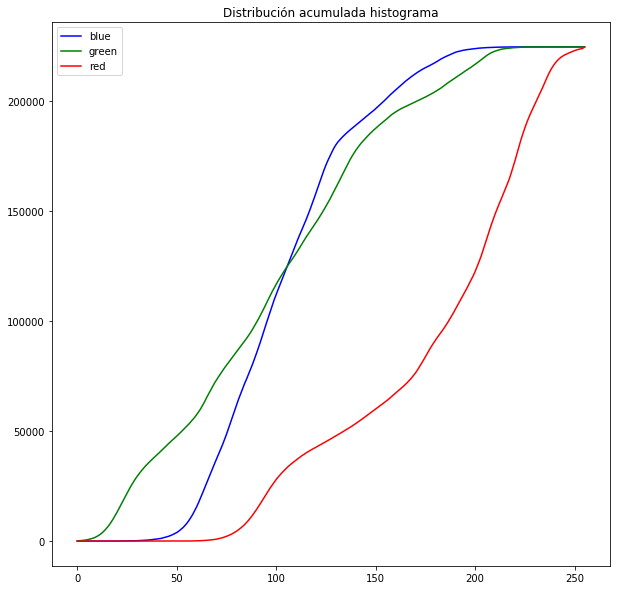

In [384]:
plt.figure(figsize = (10,10))

cumsum_b = hist_b.cumsum()
cumsum_g = hist_g.cumsum()
cumsum_r = hist_r.cumsum()

plt.plot(cumsum_b,color ='b',label ='blue')
plt.plot(cumsum_g,color ='g',label = 'green')
plt.plot(cumsum_r,color ='r',label = 'red')

plt.title('Distribución acumulada histograma')
plt.legend()

### Ecualización

In [394]:
cumsum_b = (cumsum_b - cumsum_b.min())*255/(cumsum_b.max()-cumsum_b.min())
cumsum_g = (cumsum_g - cumsum_g.min())*255/(cumsum_g.max()-cumsum_g.min())
cumsum_r = (cumsum_r - cumsum_r.min())*255/(cumsum_r.max()-cumsum_r.min())

In [395]:
lena_equalized_b = cumsum_b[lena[:,:,0]]
lena_equalized_g = cumsum_g[lena[:,:,1]]
lena_equalized_r = cumsum_r[lena[:,:,2]]

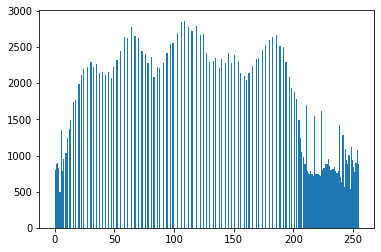

In [396]:
hist_equalized_b = plt.hist(lena_equalized_b.flatten(),bins = 256)

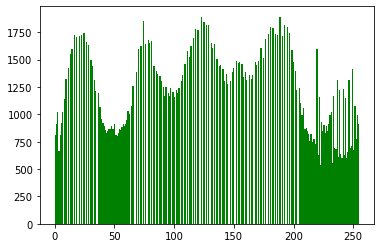

In [397]:
hist_equalized_g = plt.hist(lena_equalized_g.flatten(),bins = 256,color = 'g')

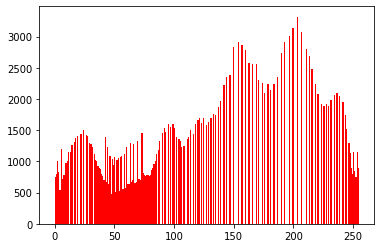

In [398]:
hist_equalized_r = plt.hist(lena_equalized_r.flatten(),bins = 256,color = 'r')

/Users/omarolivares/anaconda3/envs/IA-2019_2/lib/python3.6/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/Users/omarolivares/anaconda3/envs/IA-2019_2/lib/python3.6/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


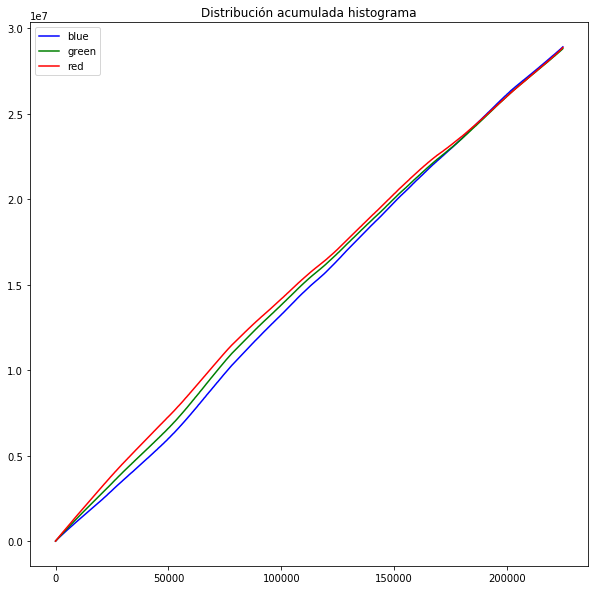

In [407]:
plt.figure(figsize = (10,10))

cumsum_b = lena_equalized_b.cumsum()
cumsum_g = lena_equalized_g.cumsum()
cumsum_r = lena_equalized_r.cumsum()

plt.plot(cumsum_b,color ='b',label ='blue')
plt.plot(cumsum_g,color ='g',label = 'green')
plt.plot(cumsum_r,color ='r',label = 'red')

plt.title('Distribución acumulada histograma')
plt.legend()

In [399]:
new_lena = np.empty(shape = lena.shape)

In [400]:
new_lena[:,:,0] = lena_equalized_b
new_lena[:,:,1] = lena_equalized_g
new_lena[:,:,2] = lena_equalized_r
new_lena = new_lena.astype(np.dtype('uint8'))

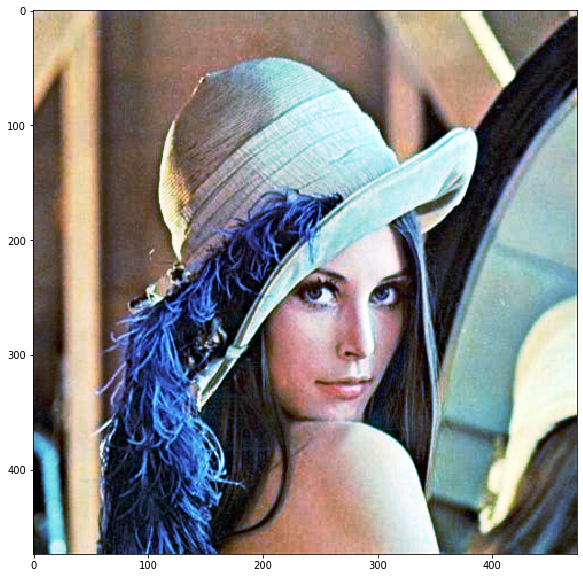

In [401]:
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(new_lena,cv2.COLOR_BGR2RGB))